<a href="https://colab.research.google.com/github/hksantosh/eip/blob/master/week3/Assignment%203_tf2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 2.x selected.
2.0.0


In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import utils

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

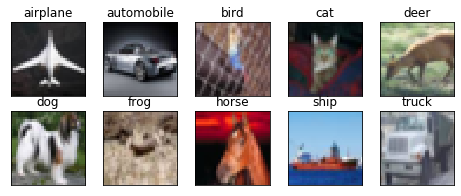

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history. history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = utils.to_categorical(train_labels, num_classes)
test_labels = utils.to_categorical(test_labels, num_classes)

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, padding='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, padding='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, padding='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 48)        1344      
_________________________________________________________________
activation (Activation)      (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 48)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 96)        4

Epoch 1/50
391/391 [==============================] - 20s 50ms/step - loss: 0.9734 - accuracy: 0.6630 - val_loss: 0.8619 - val_accuracy: 0.7004
Epoch 2/50
391/391 [==============================] - 20s 50ms/step - loss: 0.8860 - accuracy: 0.6940 - val_loss: 0.7728 - val_accuracy: 0.7343
Epoch 3/50
391/391 [==============================] - 19s 50ms/step - loss: 0.8066 - accuracy: 0.7240 - val_loss: 0.7203 - val_accuracy: 0.7517
Epoch 4/50
391/391 [==============================] - 19s 49ms/step - loss: 0.7662 - accuracy: 0.7383 - val_loss: 0.7168 - val_accuracy: 0.7583
Epoch 5/50
391/391 [==============================] - 20s 50ms/step - loss: 0.7254 - accuracy: 0.7517 - val_loss: 0.6778 - val_accuracy: 0.7726
Epoch 6/50
391/391 [==============================] - 19s 50ms/step - loss: 0.7031 - accuracy: 0.7620 - val_loss: 0.6454 - val_accuracy: 0.7799
Epoch 7/50
391/391 [==============================] - 20s 50ms/step - loss: 0.6628 - accuracy: 0.7759 - val_loss: 0.6792 - val_accuracy:

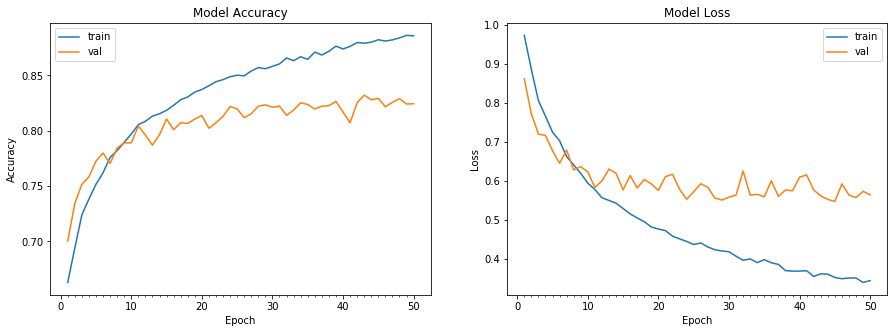

Accuracy on test data is: 82.44


In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128), 
                                 epochs = 50, validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
 # Define the mymodel
mymodel = Sequential()
mymodel.add(Convolution2D(48, 3, padding='same', input_shape=(32, 32, 3)))
mymodel.add(Activation('relu'))
mymodel.add(Convolution2D(48, 3))
mymodel.add(Activation('relu'))
mymodel.add(MaxPooling2D(pool_size=(2, 2)))
mymodel.add(Dropout(0.25))
mymodel.add(Convolution2D(96, 3, padding='same'))
mymodel.add(Activation('relu'))
mymodel.add(Convolution2D(96, 3))
mymodel.add(Activation('relu'))
mymodel.add(MaxPooling2D(pool_size=(2, 2)))
mymodel.add(Dropout(0.25))
mymodel.add(Convolution2D(192, 3, padding='same'))
mymodel.add(Activation('relu'))
mymodel.add(Convolution2D(192, 3))
mymodel.add(Activation('relu'))
mymodel.add(MaxPooling2D(pool_size=(2, 2)))
mymodel.add(Dropout(0.25))
mymodel.add(Flatten())
mymodel.add(Dense(512))
mymodel.add(Activation('relu'))
mymodel.add(Dropout(0.5))
mymodel.add(Dense(256))
mymodel.add(Activation('relu'))
mymodel.add(Dropout(0.5))
mymodel.add(Dense(num_classes, activation='softmax'))
# Compile the mymodel
mymodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

mymodel.summary()

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the mymodel
start = time.time()
# Train the mymodel
mymodel_info = mymodel.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128), 
                                 epochs = 50, validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("mymodel took %0.2f seconds to train"%(end - start))
# plot mymodel history
plot_mymodel_history(mymodel_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, mymodel))